### “Prediction of Stock prices"
**Problem : Prediction of the stock market is one of the most difficult things to do. There are so many factors involved in the
prediction- physical factors vs. physiological, rational, and irrational behavior etc. All these aspects combine to make share 
prices volatile and difficult to predict with a high degree of accuracy.**

**Solution : In this project I am going to build a model to predict the movement of the stock price. To solve this problem,
I am going to implement a mix of machine learning algorithms to predict the future stock price of the company, starting with
linear regression,mean value plot outoregression model, and then move on to Auto ARIMA, Prophet.**

**Dataset: In this project I will work with historical data about the stock prices of the publicly listed companies. For this
purpose I will be using dataset from Kaggle : "Huge stock market Dataset". 
This dataset will be analyzed using python.**

**Can we use machine learning as a game changer in this domain? Using features like the latest announcements about an 
organization, their quarterly revenue results, etc., machine learning techniques have the potential to unearth patterns and
insights we didn’t see before, and these can be used to make unerringly accurate predictions.we will work with historical data
about the stock prices of a publicly listed company.**

**We will implement a mix of machine learning algorithms to predict the future stock price of this company, starting with simple
algorithms like linear regression, and then move on to advanced techniques like Auto ARIMA and prophet . Aslo we can compair
these differnet models that which model best fits to solve aur problem.**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import os
from pandas import datetime
from subprocess import check_output
import seaborn as sns
import warnings
from pandas.plotting import lag_plot

# Analysis imports
from pandas.plotting import lag_plot
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import DataFrame
from pandas import concat

# Modelling imports
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMA
from fbprophet import Prophet
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.layers import Dropout





ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.
Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\user\Anaconda3\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\user\Anaconda3\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [4]:
filename =print(os.listdir("C:/Users/user/Downloads/price-volume-data-for-all-us-stocks-etfs/Data/"))


['ETFs', 'Stocks']


In [5]:
microsoft = pd.read_csv("C:/Users/user/Downloads/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/msft.us.txt")
microsoft.head()


,Date,Open,High,Low,Close,Volume,OpenInt
0,1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,0
1,1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0
2,1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0
3,1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0
4,1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0


In [6]:
print(microsoft.tail())

            Date   Open    High      Low  Close    Volume  OpenInt
7978  2017-11-06  84.20  84.700  84.0825  84.47  19852151        0
7979  2017-11-07  84.77  84.900  83.9300  84.26  17927878        0
7980  2017-11-08  84.14  84.610  83.8300  84.56  18029584        0
7981  2017-11-09  84.11  84.270  82.9000  84.09  21175384        0
7982  2017-11-10  83.79  84.095  83.2300  83.87  19396301        0


In [7]:
print(microsoft.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


In [8]:
print(microsoft.shape)


(7983, 7)


In [9]:
print(microsoft.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7983 entries, 0 to 7982
Data columns (total 7 columns):
Date       7983 non-null object
Open       7983 non-null float64
High       7983 non-null float64
Low        7983 non-null float64
Close      7983 non-null float64
Volume     7983 non-null int64
OpenInt    7983 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 436.6+ KB
None


In [10]:
microsoft.describe()

,Open,High,Low,Close,Volume,OpenInt
count,7983.000000,7983.000000,7983.000000,7983.000000,7.983000e+03,7983.0
mean,18.977859,19.187219,18.773635,18.984698,7.945800e+07,0.0
std,16.416068,16.552604,16.277882,16.424012,5.214889e+07,0.0
min,0.067200,0.067200,0.067200,0.067200,0.000000e+00,0.0
25%,2.113300,2.155100,2.079700,2.113300,4.910587e+07,0.0
50%,20.462000,20.697000,20.251000,20.469000,7.059385e+07,0.0
75%,25.475000,25.754000,25.233000,25.483500,9.734927e+07,0.0
max,84.770000,86.200000,84.082500,84.560000,1.371331e+09,0.0


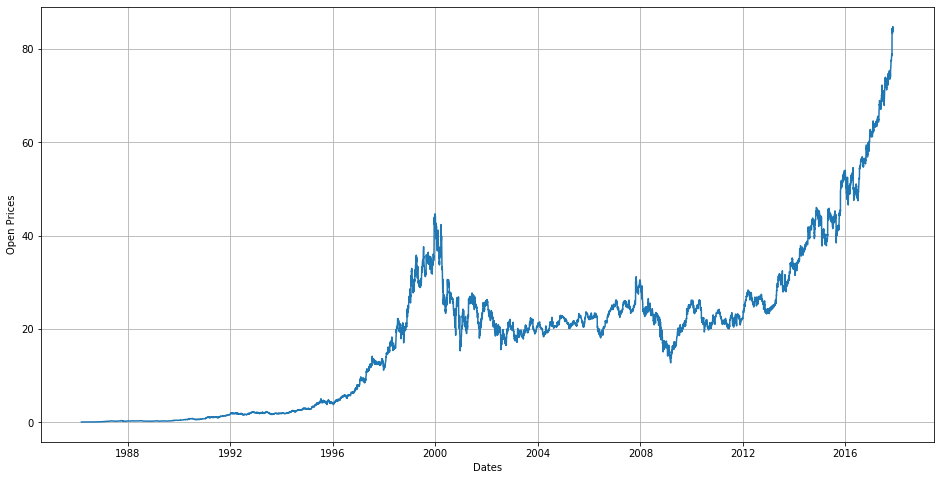

In [11]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv("C:/Users/user/Downloads/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/msft.us.txt", sep=',', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(data['Open']);

### Data Analysis

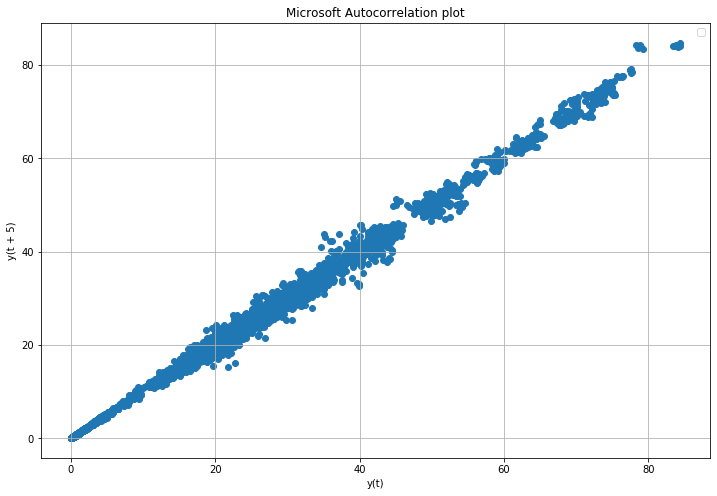

In [12]:

# Autocorrelation plot
plt.figure(figsize=(12,8))
lag_plot(data['Open'], lag=5)
plt.title('Microsoft Autocorrelation plot')
plt.grid(True)
plt.legend();

### Seasonal decompose
**Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.
Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.**

<Figure size 1152x576 with 0 Axes>

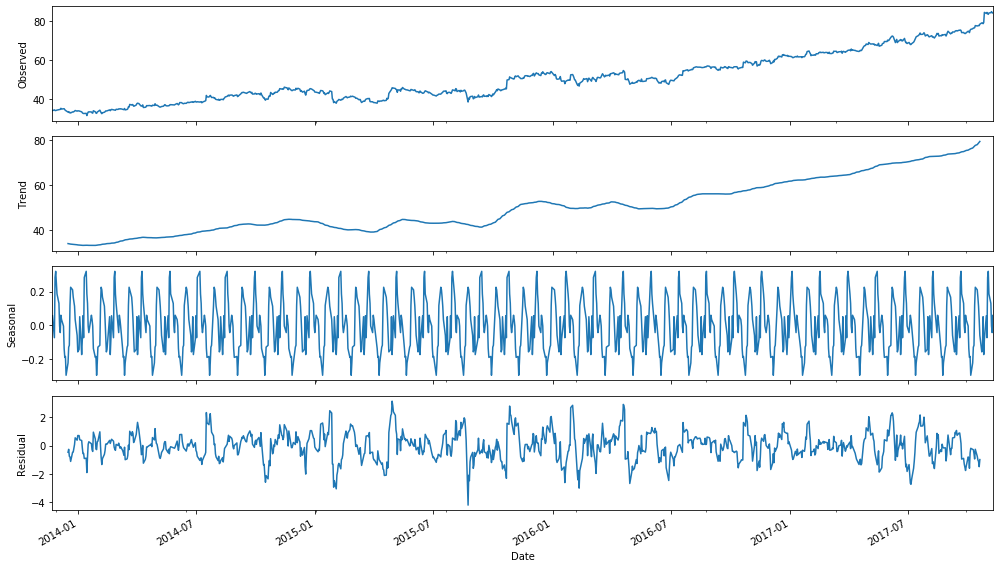

In [13]:
# Seasonal decompose
rcParams['figure.figsize'] = 14, 8
data_arima = data['Open']
result = seasonal_decompose(data_arima[-1000:], model='additive', freq=30)
plt.figure(figsize=(16,8))
fig = result.plot()
plt.show()

In [14]:
values = DataFrame(data['Open'].values)
dataframe = concat([values.shift(1),values.shift(5),values.shift(10),values.shift(30), values], axis=1)
dataframe.columns = ['t', 't+1', 't+5', 't+10', 't+30']
result = dataframe.corr()
print(result)

             t       t+1       t+5      t+10      t+30
t     1.000000  0.998730  0.997226  0.991517  0.999663
t+1   0.998730  1.000000  0.998412  0.992457  0.998428
t+5   0.997226  0.998412  1.000000  0.993838  0.996945
t+10  0.991517  0.992457  0.993838  1.000000  0.991312
t+30  0.999663  0.998428  0.996945  0.991312  1.000000


### Train-Test Split 

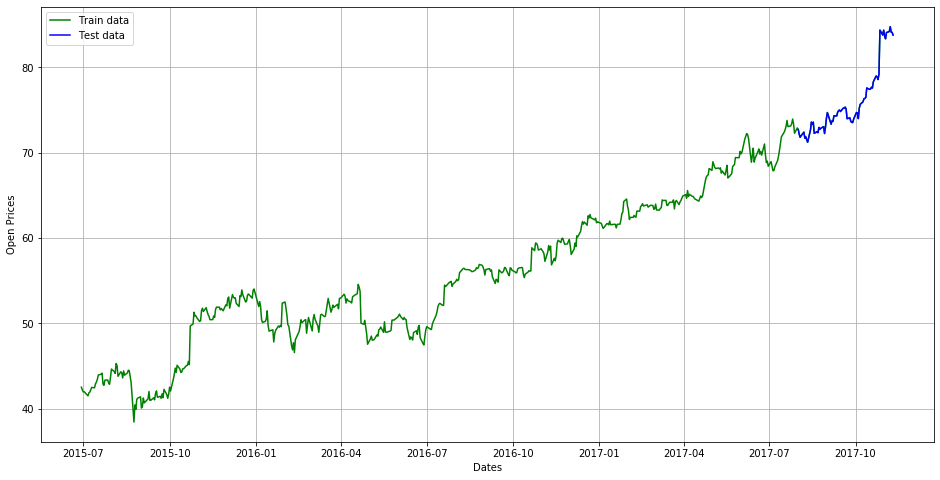

In [15]:
 # Train-Test Split 

train_data, test_data = data[0:-73], data[-73:]
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(data['Open'].tail(600), 'green', label='Train data')
plt.plot(test_data['Open'], 'blue', label='Test data')
plt.legend()

### mean value plot

MSE: 3257.0406718181657
MAE: 56.93560717143795
RMSE: 57.07048862431586


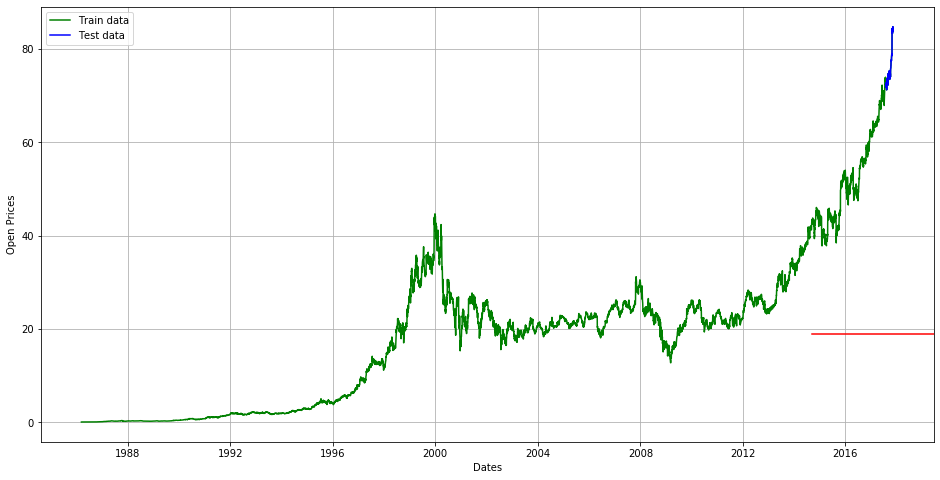

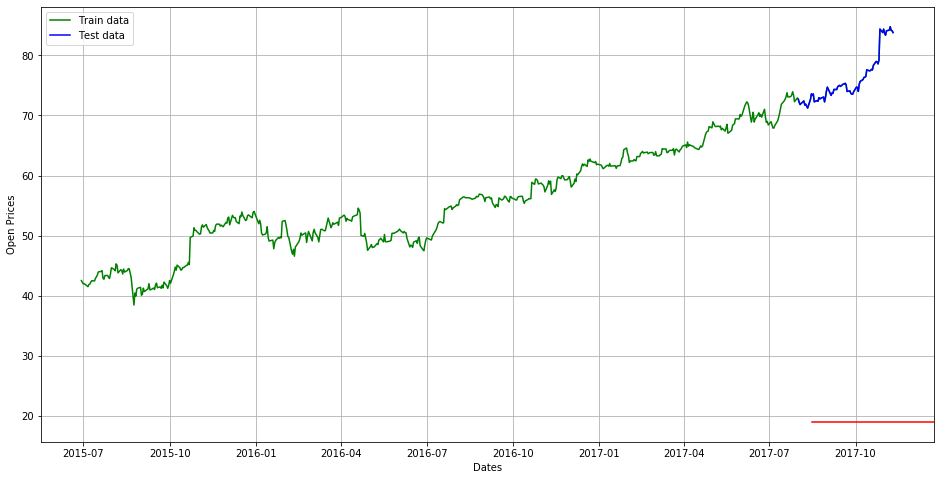

In [16]:
# mean value plot

mean_value = data['Open'].mean() # calculation of mean price

plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(data['Open'], 'green', label='Train data')
plt.plot(test_data['Open'], 'blue', label='Test data')
plt.axhline(y=mean_value, xmin=0.864, xmax=1, color='red')
plt.legend()

plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(data['Open'].tail(600), 'green', label='Train data')
plt.plot(test_data['Open'], 'blue', label='Test data')
plt.axhline(y=mean_value, xmin=0.864, xmax=1, color='red')
plt.legend()

print('MSE: '+str(mean_squared_error(test_data['Open'], np.full(len(test_data), mean_value))))
print('MAE: '+str(mean_absolute_error(test_data['Open'], np.full(len(test_data), mean_value))))
print('RMSE: '+str(sqrt(mean_squared_error(test_data['Open'], np.full(len(test_data), mean_value)))))

### Autoregression model

**In an autoregression model, we forecast the variable of interest using a linear combination of past values of the variable. 
The term autoregression indicates that it is a regression of the variable against itself.
Autoregressive models are remarkably flexible at handling a wide range of different time series patterns.
An autoregression model makes an assumption that the observations at previous time steps are useful to predict the value at
the next time step.
This relationship between variables is called correlation.
If both variables change in the same direction (e.g. go up together or down together), this is called a positive correlation.
If the variables move in opposite directions as values change (e.g. one goes up and one goes down), then this is called
negative correlation.**

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Lag: 36
MSE: 0.6616256458022208
MAE: 0.4987380150418287
RMSE: 0.8134037409566179


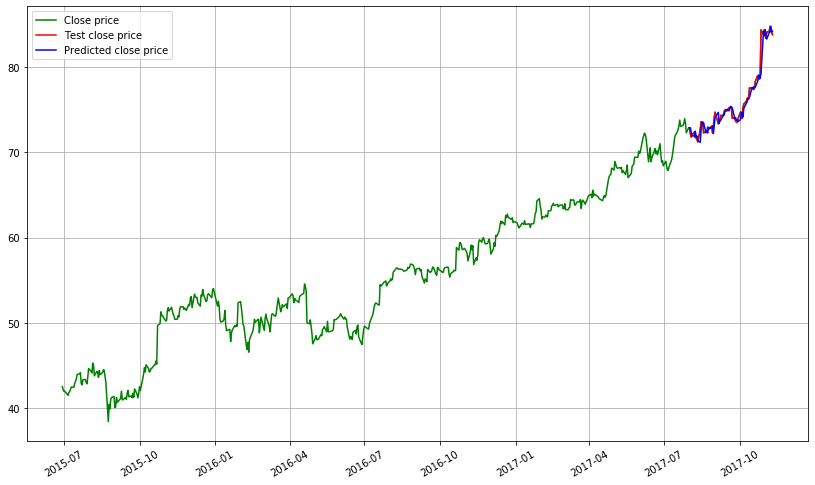

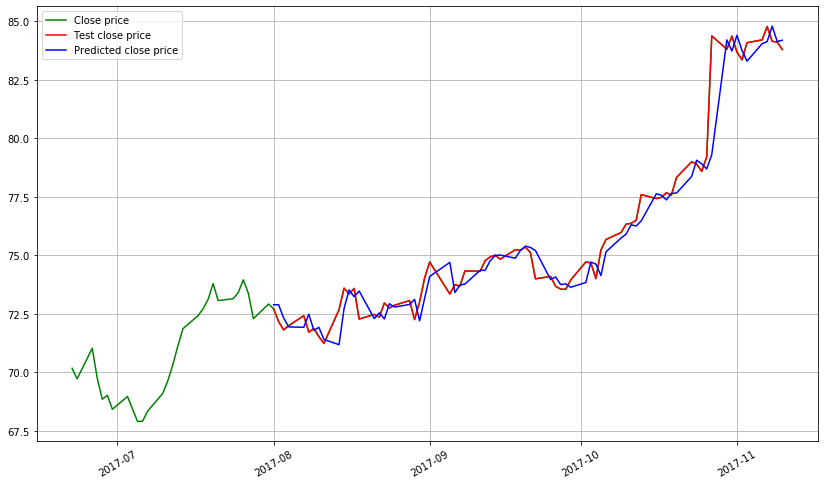

In [17]:
# Autoregression model

train_ar = train_data['Open']
test_ar = test_data['Open']

model = AR(train_ar)# train autoregression
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

# walk forward over time steps in test
history = train_ar[len(train_ar)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test_ar)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test_ar[t]
    predictions.append(yhat)
    history.append(obs)
 
plt.figure(figsize=(14,8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label='Close price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Test close price')
plt.plot(test_data.index, predictions, color='blue', label='Predicted close price')
plt.xticks(rotation=30)
plt.grid(True)
plt.legend()
plt.figure(figsize=(14,8))
print('Lag: %s' % model_fit.k_ar)
plt.plot(data.index[-100:], data['Open'].tail(100), color='green', label='Close price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Test close price')
plt.plot(test_data.index, predictions, color='blue', label='Predicted close price')
plt.xticks(rotation=30)
plt.grid(True)
plt.legend()

print('MSE: '+str(mean_squared_error(test_data['Open'], predictions)))
print('MAE: '+str(mean_absolute_error(test_data['Open'], predictions)))
print('RMSE: '+str(sqrt(mean_squared_error(test_data['Open'], predictions))))

####  Moving Average 
**‘Average’ is easily one of the most common things we use in our day-to-day lives. For instance, calculating the average marks 
 to determine overall performance, or finding the average temperature of the past few days to get an idea about today’s
 temperature – these all are routine tasks we do on a regular basis.
 So this is a good starting point to use on our dataset for making predictions.
 The predicted closing price for each day will be the average of a set of previously observed values.
 Instead of using the simple average, we will be using the moving average technique which uses the latest set of values
 for each prediction. In other words, for each subsequent step, the predicted values are taken into consideration while
 removing the oldest observed value from the set 
 The first step is to create a dataframe that contains only the Date and Close price columns, then split it into train and
 validation sets to verify our predictions**

In [20]:
# Moving Average 
# creating dataframe with date and target variable.
data = microsoft.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(microsoft)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [21]:
#splitting into train and validation
train = new_data[:4000]
valid = new_data[4000:]

In [22]:
new_data.shape, train.shape, valid.shape

((7983, 2), (4000, 2), (3983, 2))

In [23]:
train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()


('1986-03-13', '2002-01-17', '2002-01-18', '2017-11-10')

In [24]:
#make predictions
preds = []
for i in range(0,3983):
    a = train['Close'][len(train)-3983+i:].sum() + sum(preds)
    b = a/3983
    preds.append(b)

In [26]:
#calculate rmse

print('MSE:'+str((np.mean(np.power((np.array(valid['Close'])-preds),2)))))
print('MAE:'+str((np.mean(np.array(valid['Close'])-preds))))
print('RMSE :'+str((np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2))))))


MSE:459.4412239339402
MAE:16.80855381465118
RMSE :21.434580096982078


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


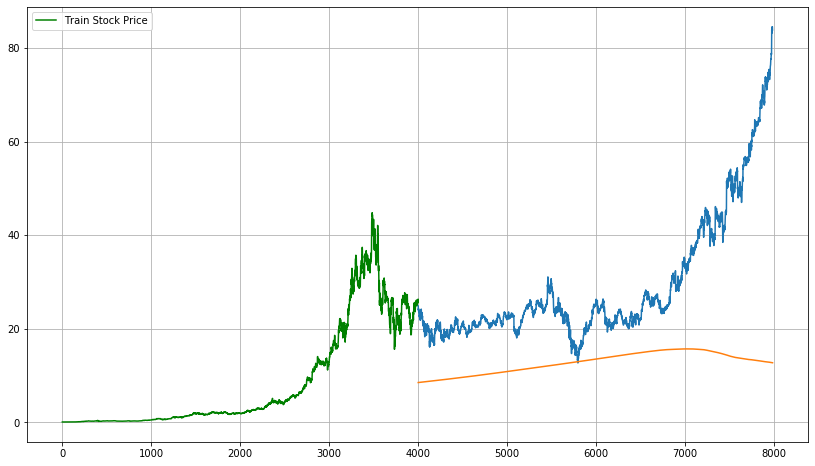

In [27]:
#plot

valid['Predictions'] = 0
valid['Predictions'] = preds
plt.figure(figsize=(14,8))
plt.plot(train['Close'],color='green', label = 'Train Stock Price')
plt.plot(valid[['Close', 'Predictions']])          
plt.legend()
plt.grid(True)
plt.show()




####  Linear Regression

**The most basic machine learning algorithm that can be implemented on this data is linear regression. The linear regression model
returns an equation that determines the relationship between the independent variables and the dependent variable.**


In [30]:
# Linear Regression
# Prices is the predict value and initial the independet variable (y)
prices = microsoft['Close'].tolist()
initial = (microsoft['Open']).tolist()


#Convert to 1d Vector
prices = np.reshape(prices, (len(prices), 1))
initial = np.reshape(initial, (len(initial), 1))

microsoft.head(5)


,Date,Open,High,Low,Close,Volume,OpenInt
0,1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,0
1,1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0
2,1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0
3,1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0
4,1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0


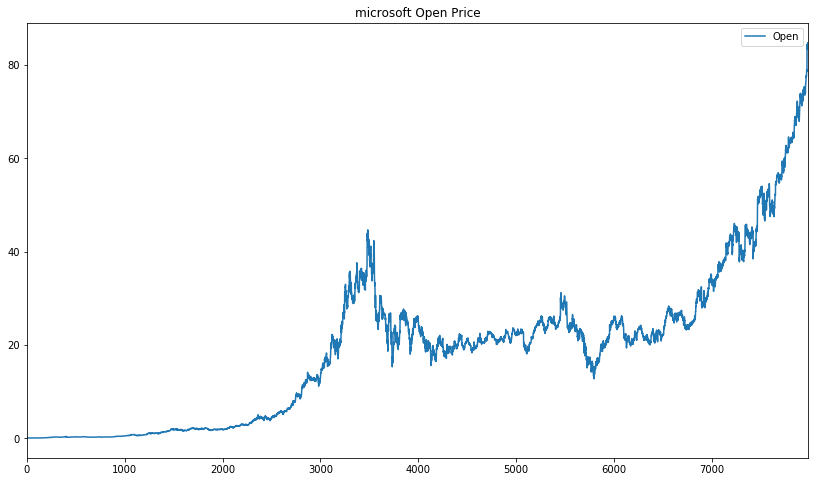

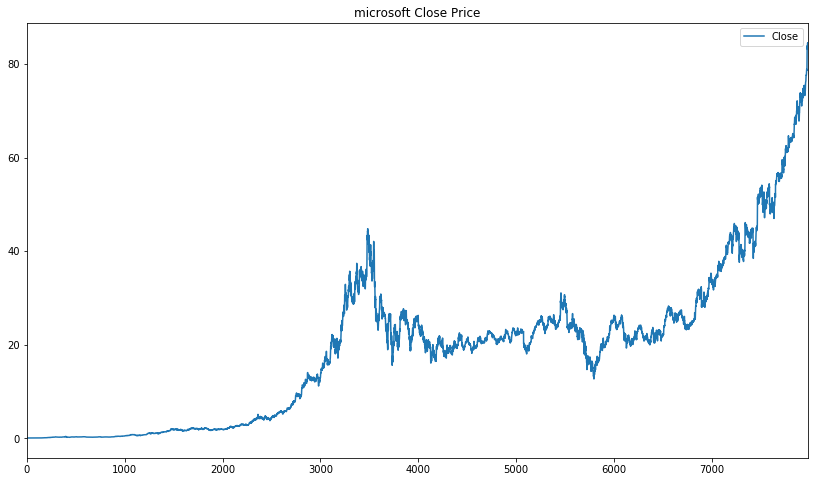

In [31]:
# First, let's check the correlation between the features of the dataset of microsoft.
microsoft[['Open']].plot()
plt.title('microsoft Open Price')
plt.show()

microsoft[['Close']].plot()
plt.title('microsoft Close Price')
plt.show()

#### **from both the figures above, we clearly state that there is perfect positive correlation bwtween 'open' and 'close'.**


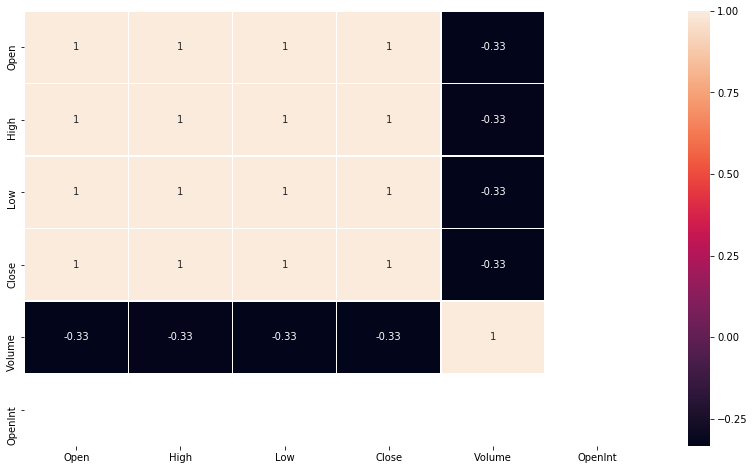

In [32]:
# lets check value of the correlation.
plt.subplots(figsize=(14,8))
sns.heatmap(microsoft.corr(),annot=True, linewidth=.5,)

Text(0, 0.5, 'Density')

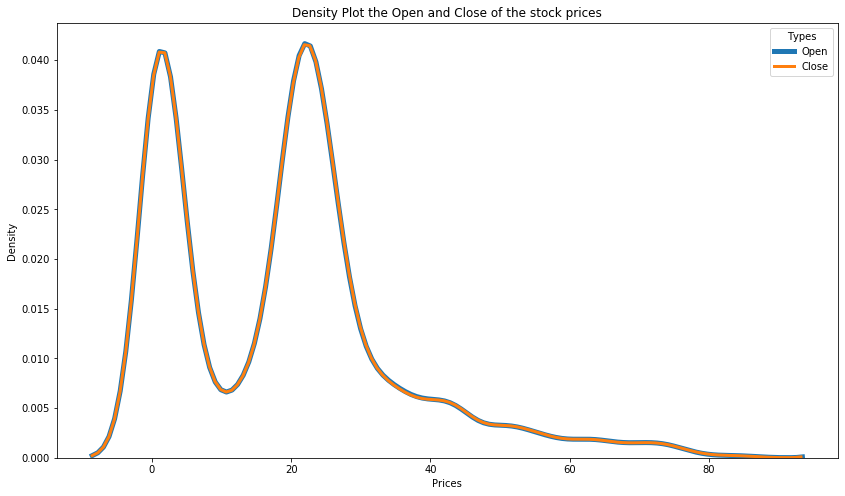

In [33]:
sns.distplot(microsoft['Open'], hist = False, kde = True, kde_kws = {'linewidth': 5},label='Open',) 
sns.distplot(microsoft['Close'], hist = False, kde = True, kde_kws = {'linewidth': 3},label='Close') 

plt.legend(prop={'size': 10}, title = 'Types',loc= 'best')
plt.title('Density Plot the Open and Close of the stock prices')
plt.xlabel('Prices')
plt.ylabel('Density')

Train-set / R2 score: 0.9995674475972668


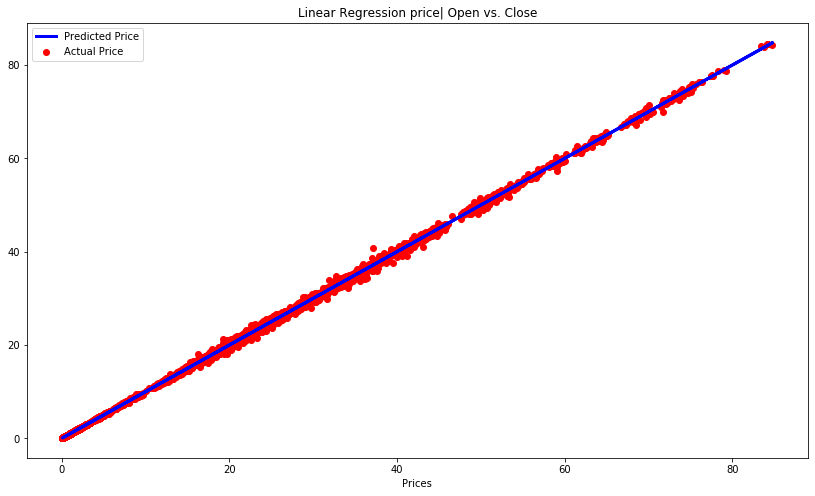

Test-set/ R2 score: 0.9995580968269052


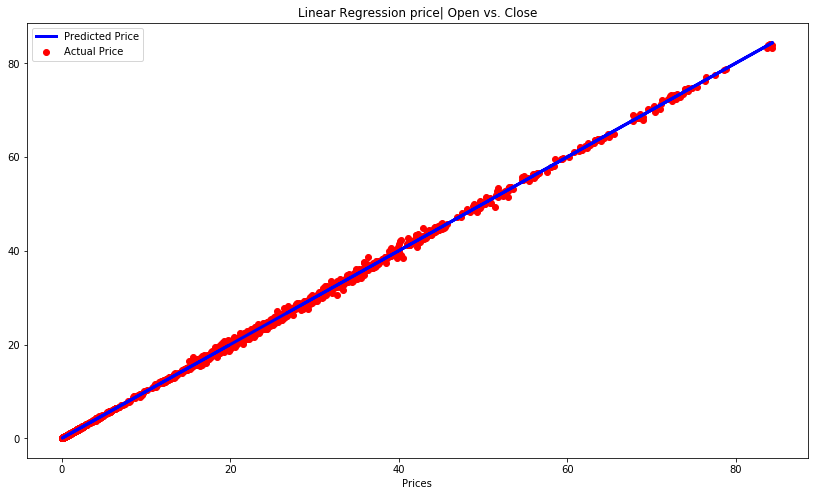

In [34]:
#Splitting the dataset into the Training set and Test set
xtrain, xtest, ytrain, ytest = train_test_split(initial, prices, test_size=0.33, random_state=42)
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)
 
#Train Set Graph
print('Train-set /','R2 score:',r2_score(ytrain,regressor.predict(xtrain)))
plt.scatter(xtrain, ytrain, color='red', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtrain, regressor.predict(xtrain), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression price| Open vs. Close')
plt.legend()
plt.xlabel('Prices')
plt.show()
 
#Test Set Graph
print('Test-set/','R2 score:',r2_score(ytest,regressor.predict(xtest)))
plt.scatter(xtest, ytest, color='red', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtest, regressor.predict(xtest), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression price| Open vs. Close')
plt.legend()
plt.xlabel('Prices')
plt.show()

### Auto ARIMA
**Introduction
ARIMA is a very popular statistical method for time series forecasting. ARIMA models take into account the past values
to predict the future values. There are three important parameters in ARIMA:
p (past values used for forecasting the next value)
q (past forecast errors used to predict the future values)
d (order of differencing)
Parameter tuning for ARIMA consumes a lot of time. So we will use auto ARIMA which automatically 
selects the best combination of (p,q,d) that provides the least error.**

In [35]:
#  Auto ARIMA 
from pmdarima.arima import auto_arima

data = microsoft.sort_index(ascending=True, axis=0)

train = data[:4000]
valid = data[4000:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=3983)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])



Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3830.493, BIC=3861.947, Fit time=105.372 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=6381.686, BIC=6394.267, Fit time=5.767 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=5393.987, BIC=5419.151, Fit time=33.641 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3810.636, BIC=3835.799, Fit time=108.408 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=3809.007, BIC=3840.461, Fit time=105.144 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=5394.247, BIC=5419.411, Fit time=16.480 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3811.353, BIC=3849.098, Fit time=232.709 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=6381.485, BIC=6400.357, Fit time=4.289 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=3812.232, BIC=3856.268, Fit time=555.693 seconds
Fit ARIMA: order

In [37]:
print('MSE:'+str((np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))))
print('MAE:'+str((np.mean(np.array(valid['Close'])-np.array(forecast['Prediction'])))))

print('RMSE :'+str((np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2))))))


MSE:1132.530706194085
MAE:-30.880377017975064
RMSE :33.653093560534444


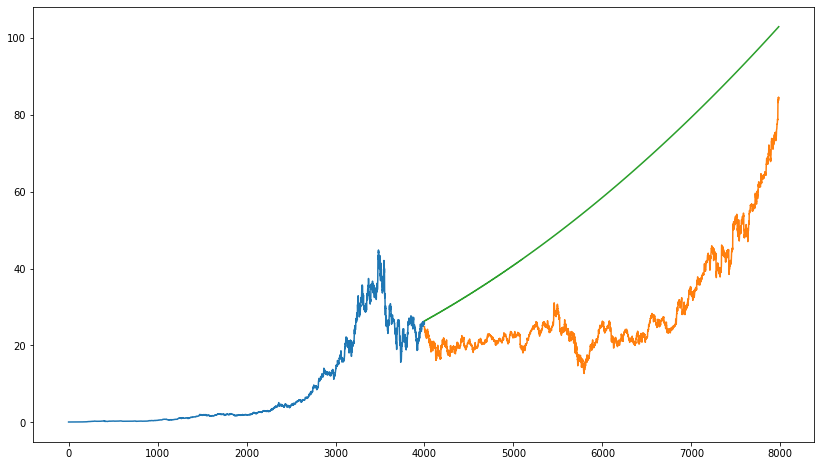

In [38]:
#plot
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

### Prophet
**There are a number of time series techniques that can be implemented on the stock prediction dataset, but most of these 
techniques require a lot of data preprocessing
before fitting the model. Prophet, designed and pioneered by Facebook, is a time series forecasting library that requires
no data preprocessing and is extremely simple to implement. The input for Prophet is a dataframe with two columns: date and
target (ds and y).
Prophet tries to capture the seasonality in the past data and works well when the dataset is large.**

In [36]:
#importing prophet
from fbprophet import Prophet

#creating dataframe
new_data = pd.DataFrame(index=range(0,len(data)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

#preparing data
new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

#train and validation
train = new_data[:4000]
valid = new_data[4000:]
#fit the model
model = Prophet()
model.fit(train)

#predictions
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
#rmse
forecast_valid = forecast['yhat'][4000:]
print('MSE:'+str((np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))))
print('MAE:'+str((np.mean(np.array(valid['y'])-np.array(forecast_valid)))))
print('RMSE :'+str((np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2))))))



MSE:592.2747161125977
MAE:15.301717336080017
RMSE :24.33669484775198


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


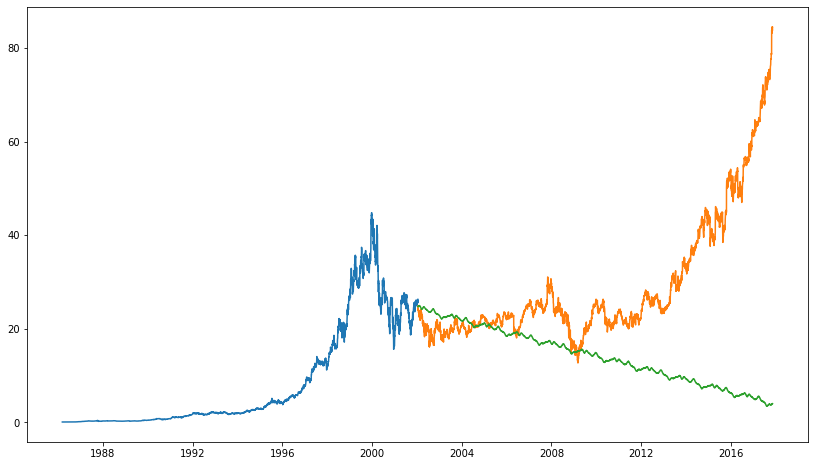

In [38]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])

In [ ]:
## Conclusion :-
1) mean value plot       : **RMSE: 0.8134037409566179**
        
2) Autoregression model  : **RMSE: 57.07048862431586**
        
3) Moving Average        : **RMSE :21.434580096982078**
        
4) ARIMA                 : **RMSE :33.653093560534444**
        
5) prophet               : **RMSE :24.33669484775198**
        
        
**Moving Average model works quite good for this dataset.This model take few seconds to run with minimum computational
requrements.**

**Linear regression is a simple technique and quite easy to interpret.It takes very few time and computational requrements are
less and no need to train the data.**

**An auto ARIMA model uses past data to understand the pattern in the time series. Using these values, the model
captured an increasing trend in the series. for this model we need to train the data It takes more time to run the model** 
**as compaired to others (about 10 mins).**
**from figure we can clearly state that this this model is not that much accurate than other models for this dataset.**

**Prophet (like most time series forecasting techniques) tries to capture the trend and seasonality from past data.
This model usually performs well on time series datasets, but fails to live up to it’s reputation in this case.**

**As it turns out, stock prices do not have a particular trend or seasonality. It highly depends on what is currently going 
on in the market and thus the prices rise and fall. Hence forecasting techniques like ARIMA, SARIMA and
Prophet would not show good results for this particular problem.**

#### From Above RMSE (Root Mean Square Error) Calculations and Figure we can state that thet Mean Value Plot works best for This Dataset.






                                **THANK YOU**













